In [1]:
# generic data science libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn import ensemble

# models
from sklearn.linear_model import LogisticRegression #Although it's called "regression" this is actually a classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score

# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve, brier_score_loss, mean_squared_error

# usability in Jupyter
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85020\3174358698.py:35: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Gather the Data

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(50)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
print(df.HomePlanet.unique())
print(df.CryoSleep.unique())
print(df.Cabin.unique())
print(df.Destination.unique())
print(df.Age.unique())
print(df.VIP.unique())
print(df.RoomService.unique())
print(df.FoodCourt.unique())
print(df.ShoppingMall.unique())
print(df.Spa.unique())
print(df.VRDeck.unique())
print(df.Name.unique())

['Europa' 'Earth' 'Mars' nan]
[False True nan]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
[False True nan]
[   0.  109.   43. ... 1569. 8586.  745.]
[   0.    9. 3576. ... 3208. 6819. 4688.]
[   0.   25.  371. ... 1085.  510. 1872.]
[   0.  549. 6715. ... 2868. 1107. 1643.]
[   0.   44.   49. ... 1164.  971. 3235.]
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [7]:
df.groupby("Cabin").size()

Cabin
A/0/P     2
A/0/S     2
A/1/S     3
A/10/P    1
A/10/S    1
         ..
T/0/P     1
T/1/P     1
T/2/P     1
T/2/S     1
T/3/P     1
Length: 6560, dtype: int64

In [8]:
#Split Out Cabin - P and S may be relevant?
# Adding new columns to the existing dataframe.
# splitting is done on the basis of forward slash.
df[['CabinSection','CabinNumber','CabinType']] = df.Cabin.str.split("/",expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinSection,CabinNumber,CabinType
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


# Clean the Data

In [9]:
# Fill NA
df["HomePlanet"] = df.HomePlanet.fillna('Unknown')
df["CryoSleep"] = df.CryoSleep.fillna('Unknown')
df["Cabin"] = df.Cabin.fillna('Unknown')
df["Destination"] = df.Destination.fillna('Unknown')
df["Age"] = df.Age.fillna(df.Age.mean())
df["VIP"] = df.VIP.fillna('Unknown')
df["RoomService"] = df.RoomService.fillna(df.RoomService.min())
df["FoodCourt"] = df.FoodCourt.fillna(df.FoodCourt.min())
df["ShoppingMall"] = df.ShoppingMall.fillna(df.ShoppingMall.min())
df["Spa"] = df.Spa.fillna(df.Spa.min())
df["VRDeck"] = df.VRDeck.fillna(df.VRDeck.min())
df["Name"] = df.Name.fillna('Unknown')
df["CabinSection"] = df.CabinSection.fillna('Unknown')
df["CabinNumber"] = df.CabinNumber.fillna('Unknown')
df["CabinType"] = df.CabinType.fillna('Unknown')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabinSection  8693 non-null   object 
 15  CabinNumber   8693 non-null   object 
 16  CabinType     8693 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [10]:
#Drop Columns I don't want
df_sub = df.drop(['CabinNumber','Name','Cabin','PassengerId'], axis=1)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  CabinSection  8693 non-null   object 
 12  CabinType     8693 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [11]:
# get dums
dums_other = pd.get_dummies(df_sub.loc[:, ["HomePlanet", "CryoSleep","Destination","VIP","CabinSection","CabinType"]], drop_first=False)
#concat
df_sub_other = pd.concat([df_sub, dums_other], axis=1)
#drop original
df_sub_other = df_sub_other.drop(["HomePlanet", "CryoSleep","Destination","VIP","CabinSection","CabinType"], axis=1)

In [12]:
#Min Max Scaling
df_sub_other[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]] = minmax_scale(df_sub_other[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])

In [13]:
df_sub_other.shape

(8693, 33)

In [14]:
df_sub_other.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,VIP_False,VIP_True,VIP_Unknown,CabinSection_A,CabinSection_B,CabinSection_C,CabinSection_D,CabinSection_E,CabinSection_F,CabinSection_G,CabinSection_T,CabinSection_Unknown,CabinType_P,CabinType_S,CabinType_Unknown
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,True,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,False,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,False,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,True,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [15]:
df_sub_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   bool   
 7   HomePlanet_Earth           8693 non-null   uint8  
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  HomePlanet_Unknown         8693 non-null   uint8  
 11  CryoSleep_False            8693 non-null   uint8  
 12  CryoSleep_True             8693 non-null   uint8  
 13  CryoSleep_Unknown          8693 non-null   uint8

# Look at Corrleations

In [16]:
df_sub_other.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,VIP_False,VIP_True,VIP_Unknown,CabinSection_A,CabinSection_B,CabinSection_C,CabinSection_D,CabinSection_E,CabinSection_F,CabinSection_G,CabinSection_T,CabinSection_Unknown,CabinType_P,CabinType_S,CabinType_Unknown
Age,1.000000,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249,-0.200235,0.217444,0.016081,-0.000361,0.072933,-0.070736,-0.010071,0.016709,-0.028247,-0.001036,0.012990,-0.058410,0.091574,-0.009462,0.074245,0.103166,0.126428,0.077091,0.028312,-0.018762,-0.209792,0.013673,0.003356,-0.011758,0.010749,0.003356
RoomService,0.068425,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.138316,-0.066635,0.245222,-0.005421,0.240750,-0.244089,-0.000874,-0.023441,-0.063354,0.060684,-0.003680,-0.050354,0.056566,0.014006,-0.022937,-0.064536,-0.019494,0.160699,0.043935,0.085627,-0.145289,0.007525,0.026508,0.006991,-0.014918,0.026508
FoodCourt,0.127343,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.208772,0.365102,-0.124755,-0.018165,0.202675,-0.205928,0.000613,0.134952,-0.065400,-0.073520,-0.010735,-0.088208,0.125499,-0.001620,0.119327,0.155351,0.257511,0.020128,-0.038889,-0.131988,-0.149911,0.014267,0.000160,-0.019682,0.019625,0.000160
ShoppingMall,0.032846,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.069099,-0.021155,0.111654,-0.008430,0.207213,-0.207798,-0.007749,-0.013739,-0.031245,0.033063,-0.005859,0.000992,0.018412,-0.019614,-0.017335,-0.010750,0.000906,0.054823,0.031747,0.074473,-0.108538,-0.006787,-0.009738,0.020940,-0.018018,-0.009738
Spa,0.121071,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.155374,0.266103,-0.087989,-0.010428,0.196893,-0.198307,-0.004740,0.075096,-0.053303,-0.034497,0.007199,-0.037896,0.060991,-0.007702,0.060152,0.114257,0.163670,0.033486,-0.011736,-0.087538,-0.124342,0.036316,0.026119,-0.005700,-0.002116,0.026119
VRDeck,0.099551,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.152875,0.282556,-0.111863,-0.002003,0.190437,-0.192721,-0.001783,0.089667,-0.044861,-0.047011,-0.010290,-0.087235,0.123061,-0.000559,0.096177,0.122644,0.206639,-0.003542,-0.017905,-0.094548,-0.127434,0.012369,-0.007138,0.009089,-0.006950,-0.007138
Transported,-0.074249,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,-0.169019,0.176916,0.019544,0.002712,-0.451744,0.460132,-0.004846,0.108722,0.000092,-0.094700,0.000547,0.024602,-0.037261,0.002688,-0.002623,0.144733,0.108193,-0.034046,-0.097965,-0.087753,0.016269,-0.014568,-0.000340,-0.101397,0.101455,-0.000340
HomePlanet_Earth,-0.200235,-0.138316,-0.208772,-0.069099,-0.155374,-0.152875,-0.169019,1.000000,-0.604411,-0.534195,-0.163174,0.107932,-0.109133,-0.001297,-0.149534,0.232218,-0.015000,0.004267,0.107343,-0.162341,0.011497,-0.184750,-0.332759,-0.325196,-0.255840,-0.052634,0.066562,0.578136,-0.025444,-0.015948,0.020006,-0.015226,-0.015948
HomePlanet_Europa,0.217444,-0.066635,0.365102,-0.021155,0.266103,0.282556,0.176916,-0.604411,1.000000,-0.287022,-0.087673,-0.094665,0.093395,0.008236,0.293517,-0.163308,-0.149679,-0.014224,-0.094805,0.147008,-0.013747,0.299343,0.538379,0.525633,0.080738,-0.077058,-0.392191,-0.368075,0.030943,0.021845,-0.040700,0.034147,0.021845
HomePlanet_Mars,0.016081,0.245222,-0.124755,0.111654,-0.087989,-0.111863,0.019544,-0.534195,-0.287022,1.000000,-0.077488,-0.031692,0.032715,-0.001669,-0.120996,-0.111260,0.170778,0.010346,-0.033617,0.043523,0.003647,-0.087734,-0.158020,-0.154428,0.232730,0.145291,0.333929,-0.325315,-0.012083,-0.006255,0.021160,-0.019279,-0.006255


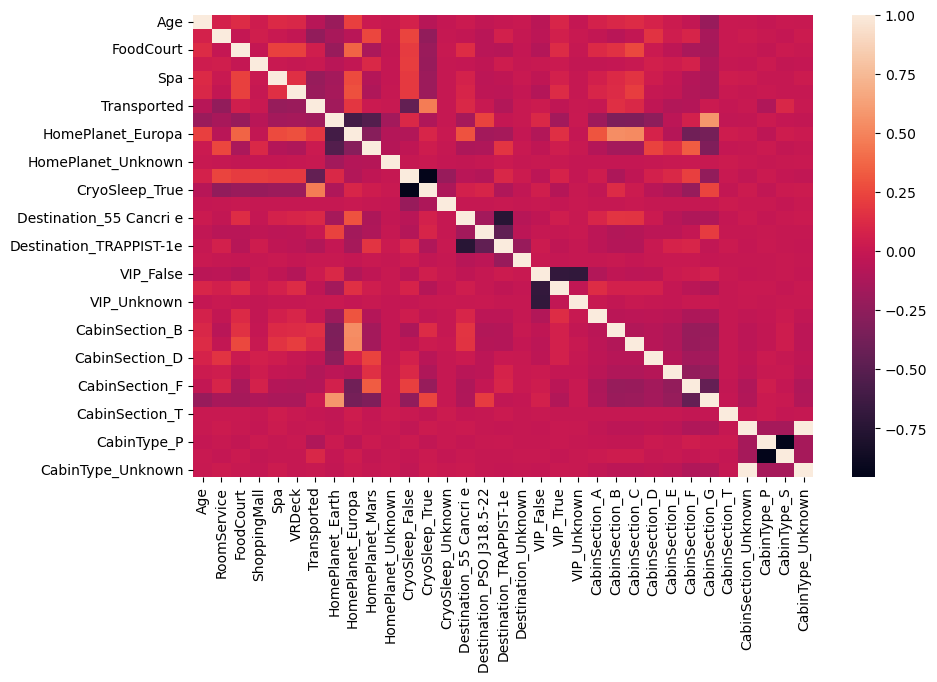

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub_other.corr())
plt.show()

# Machine Learning

In [18]:
# get pandas columns for prediction
target = df_sub_other["Transported"]
features = df_sub_other.drop(["Transported"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [19]:
# Define the search space
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

In [20]:
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [21]:
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(seed=0, **params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='recall', 
                            n_jobs=-1).mean()
        # Loss is negative score
    loss = - score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [22]:
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 1000, trials = Trials())

100%|████████████████████████████████████████████| 1000/1000 [10:59<00:00,  1.52trial/s, best loss: -0.847096859853323]


In [23]:
# Print the index of the best parameters
print(best)
# Print the values of the best parameters
print(space_eval(space, best))

{'colsample_bytree': 6, 'gamma': 2, 'learning_rate': 3, 'max_depth': 0, 'reg_alpha': 2, 'reg_lambda': 0}
{'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'reg_alpha': 0.1, 'reg_lambda': 1e-05}


In [24]:
# Train model using the best parameters
xgboost_bo = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train,y_train)

In [25]:
# Make prediction using the best model
bayesian_opt_predict = xgboost_bo.predict(X_test)
# Get predicted probabilities
bayesian_opt_predict_prob = xgboost_bo.predict_proba(X_test)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)
# Print result
print(f'The recall value for the xgboost Bayesian optimization is {recall[1]:.4f}')

The recall value for the xgboost Bayesian optimization is 0.8396


# Model Selection

In [26]:
# Train model using the best parameters
xgboost_bo = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X,y)

In [27]:
import pickle

# save the model to disk
filename = 'bay_model.sav'
pickle.dump(xgboost_bo, open(filename, 'wb'))

# Prepare the Testing Data

In [28]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [29]:
test_df[['CabinSection','CabinNumber','CabinType']] = test_df.Cabin.str.split("/",expand=True)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinSection,CabinNumber,CabinType
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [30]:
# Fill NA
test_df["HomePlanet"] = test_df.HomePlanet.fillna('Unknown')
test_df["CryoSleep"] = test_df.CryoSleep.fillna('Unknown')
test_df["Cabin"] = test_df.Cabin.fillna('Unknown')
test_df["Destination"] = test_df.Destination.fillna('Unknown')
test_df["Age"] = test_df.Age.fillna(df.Age.mean())
test_df["VIP"] = test_df.VIP.fillna('Unknown')
test_df["RoomService"] = test_df.RoomService.fillna(df.RoomService.min())
test_df["FoodCourt"] = test_df.FoodCourt.fillna(df.FoodCourt.min())
test_df["ShoppingMall"] = test_df.ShoppingMall.fillna(df.ShoppingMall.min())
test_df["Spa"] = test_df.Spa.fillna(df.Spa.min())
test_df["VRDeck"] = test_df.VRDeck.fillna(df.VRDeck.min())
test_df["Name"] = test_df.Name.fillna('Unknown')
test_df["CabinSection"] = test_df.CabinSection.fillna('Unknown')
test_df["CabinNumber"] = test_df.CabinNumber.fillna('Unknown')
test_df["CabinType"] = test_df.CabinType.fillna('Unknown')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
 13  CabinSection  4277 non-null   object 
 14  CabinNumber   4277 non-null   object 
 15  CabinType     4277 non-null   object 
dtypes: float64(6), object(10)
memory usage: 534.8+ KB


In [31]:
#Drop Columns I don't want
test_df_sub = test_df.drop(['CabinNumber','Name','Cabin','PassengerId'], axis=1)
test_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  CabinSection  4277 non-null   object 
 11  CabinType     4277 non-null   object 
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


In [32]:
# get dums
dums_test = pd.get_dummies(test_df_sub.loc[:, ["HomePlanet", "CryoSleep","Destination","VIP","CabinSection","CabinType"]], drop_first=False)
#concat
df_test_sub = pd.concat([test_df_sub, dums_test], axis=1)
#drop original
df_test_sub = df_test_sub.drop(["HomePlanet", "CryoSleep","Destination","VIP","CabinSection","CabinType"], axis=1)

In [33]:
#Min Max Scaling
df_test_sub[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]] = minmax_scale(df_test_sub[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])

In [34]:
df_test_sub

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,VIP_False,VIP_True,VIP_Unknown,CabinSection_A,CabinSection_B,CabinSection_C,CabinSection_D,CabinSection_E,CabinSection_F,CabinSection_G,CabinSection_T,CabinSection_Unknown,CabinType_P,CabinType_S,CabinType_Unknown
0,0.341772,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.240506,0.000000,0.000356,0.00000,0.142260,0.000000,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.392405,0.000000,0.000000,0.00000,0.000000,0.000000,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.481013,0.000000,0.263206,0.00000,0.009121,0.026266,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.253165,0.000865,0.000000,0.07658,0.000000,0.000000,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4273,0.531646,0.000000,0.033514,0.00205,0.000504,0.006466,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4274,0.364911,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4275,0.364911,0.000000,0.106042,0.00000,0.000000,0.023482,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [35]:
df_test_sub.shape

(4277, 32)

In [36]:
filename = 'bay_model.sav'
xgb_load = pickle.load(open(filename, 'rb'))

In [37]:
X = np.array(df_test_sub)
preds = xgb_load.predict_proba(X)
preds_singular = xgb_load.predict(X).astype(bool)

preds_singular[0]

True

In [38]:
submission = pd.DataFrame()
submission["PassengerId"] = test_df.PassengerId
submission['Transported'] = preds_singular

submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [39]:
submission.to_csv("bay_submission.csv", index=False)